In [82]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
import seaborn as sns

In [31]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [32]:
raw_data = pd.read_csv("./data-final.csv",sep= "\t")

In [33]:
raw_data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,9419.0,5491.0,3959.0,4821.0,5611.0,2756.0,2388.0,2113.0,5900.0,4110.0,6135.0,4150.0,5739.0,6364.0,3663.0,5070.0,5709.0,4285.0,2587.0,3997.0,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,7235.0,3598.0,3315.0,2564.0,2976.0,3050.0,4787.0,3228.0,3465.0,3309.0,9036.0,2406.0,3484.0,3359.0,3061.0,2539.0,4226.0,2962.0,1799.0,1607.0,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,4657.0,3549.0,2543.0,3335.0,5847.0,2540.0,4922.0,3142.0,14621.0,2191.0,5128.0,3675.0,3442.0,4546.0,8275.0,2185.0,2164.0,1175.0,3813.0,1593.0,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,3996.0,2896.0,5096.0,4240.0,5168.0,5456.0,4360.0,4496.0,5240.0,4000.0,3736.0,4616.0,3015.0,2711.0,3960.0,4064.0,4208.0,2936.0,7336.0,3896.0,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,6004.0,3965.0,2721.0,3706.0,2968.0,2426.0,7339.0,3302.0,16819.0,3731.0,4740.0,2856.0,7461.0,2179.0,3324.0,2255.0,4308.0,4506.0,3127.0,3115.0,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [34]:
df = raw_data.copy()

In [35]:
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,9419.0,5491.0,3959.0,4821.0,5611.0,2756.0,2388.0,2113.0,5900.0,4110.0,6135.0,4150.0,5739.0,6364.0,3663.0,5070.0,5709.0,4285.0,2587.0,3997.0,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,7235.0,3598.0,3315.0,2564.0,2976.0,3050.0,4787.0,3228.0,3465.0,3309.0,9036.0,2406.0,3484.0,3359.0,3061.0,2539.0,4226.0,2962.0,1799.0,1607.0,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,4657.0,3549.0,2543.0,3335.0,5847.0,2540.0,4922.0,3142.0,14621.0,2191.0,5128.0,3675.0,3442.0,4546.0,8275.0,2185.0,2164.0,1175.0,3813.0,1593.0,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,3996.0,2896.0,5096.0,4240.0,5168.0,5456.0,4360.0,4496.0,5240.0,4000.0,3736.0,4616.0,3015.0,2711.0,3960.0,4064.0,4208.0,2936.0,7336.0,3896.0,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,6004.0,3965.0,2721.0,3706.0,2968.0,2426.0,7339.0,3302.0,16819.0,3731.0,4740.0,2856.0,7461.0,2179.0,3324.0,2255.0,4308.0,4506.0,3127.0,3115.0,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [36]:
df.shape

(1015341, 110)

In [37]:
df.isnull().sum()

EXT1                     1783
EXT2                     1783
EXT3                     1783
EXT4                     1783
EXT5                     1783
EXT6                     1783
EXT7                     1783
EXT8                     1783
EXT9                     1783
EXT10                    1783
EST1                     1783
EST2                     1783
EST3                     1783
EST4                     1783
EST5                     1783
EST6                     1783
EST7                     1783
EST8                     1783
EST9                     1783
EST10                    1783
AGR1                     1783
AGR2                     1783
AGR3                     1783
AGR4                     1783
AGR5                     1783
AGR6                     1783
AGR7                     1783
AGR8                     1783
AGR9                     1783
AGR10                    1783
CSN1                     1783
CSN2                     1783
CSN3                     1783
CSN4      

In [38]:
df = df.dropna()

In [39]:
df.shape

(1012050, 110)

In [40]:
df.isnull().sum()

EXT1                     0
EXT2                     0
EXT3                     0
EXT4                     0
EXT5                     0
EXT6                     0
EXT7                     0
EXT8                     0
EXT9                     0
EXT10                    0
EST1                     0
EST2                     0
EST3                     0
EST4                     0
EST5                     0
EST6                     0
EST7                     0
EST8                     0
EST9                     0
EST10                    0
AGR1                     0
AGR2                     0
AGR3                     0
AGR4                     0
AGR5                     0
AGR6                     0
AGR7                     0
AGR8                     0
AGR9                     0
AGR10                    0
CSN1                     0
CSN2                     0
CSN3                     0
CSN4                     0
CSN5                     0
CSN6                     0
CSN7                     0
C

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1012050 entries, 0 to 1015340
Columns: 110 entries, EXT1 to long_appx_lots_of_err
dtypes: float64(104), int64(2), object(4)
memory usage: 857.1+ MB


In [42]:
personality_traits = ["EXT", "AGR", "CSN", "EST", "OPN"]
columns_list = [trait + str(number) for trait in personality_traits for number in range(1,11)]

In [43]:
print(columns_list)

['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10']


In [44]:
df['EXT1'].dtype

dtype('float64')

In [45]:
df.drop(["lat_appx_lots_of_err","long_appx_lots_of_err"], axis = 1, inplace = True)

In [46]:
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,9419.0,5491.0,3959.0,4821.0,5611.0,2756.0,2388.0,2113.0,5900.0,4110.0,6135.0,4150.0,5739.0,6364.0,3663.0,5070.0,5709.0,4285.0,2587.0,3997.0,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,7235.0,3598.0,3315.0,2564.0,2976.0,3050.0,4787.0,3228.0,3465.0,3309.0,9036.0,2406.0,3484.0,3359.0,3061.0,2539.0,4226.0,2962.0,1799.0,1607.0,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,4657.0,3549.0,2543.0,3335.0,5847.0,2540.0,4922.0,3142.0,14621.0,2191.0,5128.0,3675.0,3442.0,4546.0,8275.0,2185.0,2164.0,1175.0,3813.0,1593.0,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,3996.0,2896.0,5096.0,4240.0,5168.0,5456.0,4360.0,4496.0,5240.0,4000.0,3736.0,4616.0,3015.0,2711.0,3960.0,4064.0,4208.0,2936.0,7336.0,3896.0,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,6004.0,3965.0,2721.0,3706.0,2968.0,2426.0,7339.0,3302.0,16819.0,3731.0,4740.0,2856.0,7461.0,2179.0,3324.0,2255.0,4308.0,4506.0,3127.0,3115.0,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE


In [47]:
df[columns_list] = df[columns_list].astype(int)

In [48]:
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country
0,4,1,5,2,5,1,5,2,4,1,1,4,4,2,2,2,2,2,3,2,2,5,2,4,2,3,2,4,3,4,3,4,3,2,2,4,4,2,4,4,5,1,4,1,4,1,5,3,4,5,9419.0,5491.0,3959.0,4821.0,5611.0,2756.0,2388.0,2113.0,5900.0,4110.0,6135.0,4150.0,5739.0,6364.0,3663.0,5070.0,5709.0,4285.0,2587.0,3997.0,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB
1,3,5,3,4,3,3,2,5,1,5,2,3,4,1,3,1,2,1,3,1,1,4,1,5,1,5,3,4,5,3,3,2,5,3,3,1,3,3,5,3,1,2,4,2,3,1,4,2,5,3,7235.0,3598.0,3315.0,2564.0,2976.0,3050.0,4787.0,3228.0,3465.0,3309.0,9036.0,2406.0,3484.0,3359.0,3061.0,2539.0,4226.0,2962.0,1799.0,1607.0,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY
2,2,3,4,4,3,2,1,3,2,5,4,4,4,2,2,2,2,2,1,3,1,4,1,4,2,4,1,4,4,3,4,2,2,2,3,3,4,2,4,2,5,1,2,1,4,2,5,3,4,4,4657.0,3549.0,2543.0,3335.0,5847.0,2540.0,4922.0,3142.0,14621.0,2191.0,5128.0,3675.0,3442.0,4546.0,8275.0,2185.0,2164.0,1175.0,3813.0,1593.0,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB
3,2,2,2,3,4,2,2,4,1,4,3,3,3,2,3,2,2,2,4,3,2,4,3,4,2,4,2,4,3,4,2,4,4,4,1,2,2,3,1,4,4,2,5,2,3,1,4,4,3,3,3996.0,2896.0,5096.0,4240.0,5168.0,5456.0,4360.0,4496.0,5240.0,4000.0,3736.0,4616.0,3015.0,2711.0,3960.0,4064.0,4208.0,2936.0,7336.0,3896.0,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB
4,3,3,3,3,5,3,3,5,3,4,1,5,5,3,1,1,1,1,3,2,1,5,1,5,1,3,1,5,5,3,5,1,5,1,3,1,5,1,5,5,5,1,5,1,5,1,5,3,5,5,6004.0,3965.0,2721.0,3706.0,2968.0,2426.0,7339.0,3302.0,16819.0,3731.0,4740.0,2856.0,7461.0,2179.0,3324.0,2255.0,4308.0,4506.0,3127.0,3115.0,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE


In [49]:
_ = df[columns_list].apply(pd.Series.value_counts)

In [50]:
_.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,3717,6091,6070,6886,9761,6181,8169,6365,6837,6258,4952,9270,5013,7627,6516,10348,6294,8519,6051,8393,12174,6429,6054,6816,7827,6647,7286,8131,7498,8692,7784,9565,5506,10640,6092,10837,6297,7381,6365,7150,9184,5936,7578,6657,7675,8120,8460,8018,7682,6171
1,249403,209781,76632,101861,98351,266184,236496,78056,173108,76378,396021,35040,382652,35884,291915,53995,307469,32936,48961,33412,66912,202987,19967,214140,221477,222964,43093,234822,111310,26937,117624,87665,43843,191278,166689,178669,127861,233768,129881,202509,43815,379557,23593,413184,16268,467024,15419,103843,19918,16574
2,198907,235137,191497,207888,178281,337682,227487,175505,220978,158031,259244,89337,239095,82069,361814,103040,368701,105144,101561,97832,171568,208421,74069,291857,276158,243048,94669,273806,193075,95965,182887,218362,102793,289354,265364,254404,240023,260206,226665,254032,102283,317113,72516,301369,59273,307824,56336,198022,56579,63468
3,288087,244322,268693,279681,234063,191087,194478,229599,214622,191047,128492,187379,174694,145282,179841,183259,181255,215270,159363,303697,267468,190461,162567,230332,237647,163195,227312,315700,230010,316844,203273,262110,148050,252474,227085,212999,232677,199061,210219,218870,250908,185837,174200,188717,272565,118668,180758,251759,127869,211764
4,191359,189956,283670,256806,298781,139337,197080,274541,241981,267835,134261,353732,150601,367099,116544,328874,107915,406128,376119,348178,344331,244268,379539,183906,174051,213701,370004,132540,299022,353525,270037,279356,360043,173324,235625,226875,244750,193773,282788,207519,331532,88613,313710,68946,395077,73393,401332,286140,343829,342825


In [51]:
df = df[(df[columns_list] != 0).all(axis = 1)]

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 873173 entries, 0 to 1015340
Columns: 108 entries, EXT1 to country
dtypes: float64(54), int64(52), object(2)
memory usage: 726.1+ MB


In [53]:
_ = df[columns_list].apply(pd.Series.value_counts)

In [54]:
_.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
1,216696,179204,66438,86833,85877,229682,207401,66154,149828,64699,345065,29657,330164,30852,250950,46670,264327,28057,42332,28663,57318,175043,16633,185075,193974,194171,35906,203754,96259,22471,101913,75075,37789,166448,144666,155584,110440,203579,112222,174627,36303,333249,19797,363030,13448,406159,12528,87281,16433,13800
2,175989,205597,168264,180851,157927,296891,200626,152268,194197,136716,228956,78135,209738,71523,318068,90484,324139,91839,88980,85982,150314,182757,63745,256521,242919,214004,81426,241277,168897,82944,160086,191397,89579,254657,232900,224044,211022,229239,198788,222211,87522,278182,62952,264128,51027,271538,47704,171839,48178,55195
3,247379,212031,233849,241707,204309,164934,167772,197891,185332,164328,110165,162399,151181,125468,155483,159498,156342,186769,137979,265103,231976,163863,139397,199287,205217,140057,196317,272663,199009,274415,175437,227084,126776,218097,196204,184921,201340,171217,181712,188756,215962,157681,149826,160331,236698,101753,154308,217873,108241,183244
4,166366,166790,247168,226436,260807,121165,171194,241458,211596,234986,115655,310720,131268,321971,101541,289735,94206,356461,328714,304449,304020,213946,332692,160157,150807,186135,325673,115481,262019,310871,236563,245597,315321,152086,205381,198865,213811,169025,247497,182359,292617,75235,274847,58494,346163,63091,351783,252449,300646,299755
5,66743,109551,157454,137346,164253,60501,126180,215402,132220,272444,73332,292262,50822,323359,47131,286786,34159,210047,275168,188976,129545,137564,320706,72133,80256,138806,233851,39998,146989,182472,199174,134020,303708,81885,94022,109759,136560,100113,132954,105220,240769,28826,365751,27190,225837,30632,306850,143731,399675,321179


In [55]:
columns_list_time = [trait + str(number) + "_E" for trait in personality_traits for number in range(1, 11)]
print(columns_list_time)

['EXT1_E', 'EXT2_E', 'EXT3_E', 'EXT4_E', 'EXT5_E', 'EXT6_E', 'EXT7_E', 'EXT8_E', 'EXT9_E', 'EXT10_E', 'AGR1_E', 'AGR2_E', 'AGR3_E', 'AGR4_E', 'AGR5_E', 'AGR6_E', 'AGR7_E', 'AGR8_E', 'AGR9_E', 'AGR10_E', 'CSN1_E', 'CSN2_E', 'CSN3_E', 'CSN4_E', 'CSN5_E', 'CSN6_E', 'CSN7_E', 'CSN8_E', 'CSN9_E', 'CSN10_E', 'EST1_E', 'EST2_E', 'EST3_E', 'EST4_E', 'EST5_E', 'EST6_E', 'EST7_E', 'EST8_E', 'EST9_E', 'EST10_E', 'OPN1_E', 'OPN2_E', 'OPN3_E', 'OPN4_E', 'OPN5_E', 'OPN6_E', 'OPN7_E', 'OPN8_E', 'OPN9_E', 'OPN10_E']


In [56]:
df[columns_list_time].describe()

,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E
count,8.731730e+05,8.731730e+05,8.731730e+05,8.731730e+05,8.731730e+05,8.731730e+05,8.731730e+05,8.731730e+05,8.731730e+05,8.731730e+05,8.731730e+05,8.731730e+05,8.731730e+05,8.731730e+05,8.731730e+05,8.731730e+05,8.731730e+05,8.731730e+05,8.731730e+05,8.731730e+05,8.731730e+05,8.731730e+05,8.731730e+05,8.731730e+05,8.731730e+05,8.731730e+05,8.731730e+05,8.731730e+05,8.731730e+05,8.731730e+05,8.731730e+05,8.731730e+05,8.731730e+05,8.731730e+05,8.731730e+05,8.731730e+05,8.731730e+05,8.731730e+05,8.731730e+05,8.731730e+05,8.731730e+05,8.731730e+05,8.731730e+05,8.731730e+05,8.731730e+05,8.731730e+05,8.731730e+05,8.731730e+05,8.731730e+05,8.731730e+05
mean,9.705712e+04,8.359547e+03,9.211249e+03,7.429495e+03,7.237299e+03,6.395441e+03,7.944808e+03,6.830886e+03,5.817995e+03,7.725020e+03,1.755052e+04,8.884347e+03,6.519344e+03,8.832744e+03,8.352944e+03,5.831762e+03,8.277203e+03,9.308242e+03,5.291166e+03,6.082599e+03,1.212081e+04,9.615396e+03,8.502008e+03,8.921801e+03,9.225959e+03,9.390959e+03,5.271970e+03,1.056910e+04,5.499050e+03,1.088990e+04,9.505815e+03,8.706442e+03,7.278937e+03,1.281296e+04,1.027556e+04,8.414055e+03,6.773922e+03,5.525147e+03,5.569657e+03,4.491822e+03,8.292178e+03,1.317866e+04,7.041905e+03,1.112716e+04,5.954429e+03,8.088484e+03,7.505491e+03,5.164104e+03,6.257384e+03,4.456116e+03
std,5.154761e+06,5.911807e+05,9.403111e+05,2.935621e+05,6.397716e+05,3.461462e+05,2.705546e+05,3.346430e+05,1.557859e+05,2.310106e+06,1.769470e+06,7.614275e+05,2.638134e+05,7.220113e+05,3.728400e+05,2.839383e+05,7.075139e+05,1.507535e+06,1.600695e+05,3.234020e+05,1.302711e+06,4.552170e+05,1.272342e+06,7.036815e+05,1.090076e+06,7.100244e+05,2.362831e+05,4.545132e+05,4.308770e+05,2.361864e+06,1.327293e+06,5.931759e+05,5.070479e+05,2.570454e+06,2.329290e+06,7.516266e+05,3.873836e+05,1.648845e+05,4.751218e+05,1.332386e+05,9.853533e+05,1.296296e+06,3.755177e+05,2.334657e+06,3.046104e+05,5.487665e+05,5.860953e+05,2.250024e+05,4.490540e+05,2.442718e+05
min,-4.295876e+07,-7.563200e+04,-3.593866e+06,-2.494907e+06,-5.856600e+04,-7.986000e+04,-1.179130e+05,-4.611380e+05,-5.937000e+04,-1.422380e+05,-5.321900e+04,-3.592606e+06,-1.795552e+06,-6.778600e+04,-2.029400e+04,-2.193800e+04,-6.542300e+04,-2.702900e+04,-5.278460e+05,-8.567400e+04,-3.590638e+06,-3.599649e+07,-1.537500e+04,-3.597020e+06,-3.512740e+06,-7.424500e+04,-1.002910e+05,-2.464695e+06,-2.916700e+04,-1.498800e+04,-1.121650e+05,-7.157200e+04,-4.138100e+04,-3.598047e+06,-8.828600e+04,-8.189500e+04,-2.520786e+06,-3.599692e+06,-7.917566e+07,-4.355800e+04,-5.392774e+07,-2.152050e+05,-4.170310e+05,-7.446700e+04,-1.281720e+05,-5.099160e+05,-6.181300e+04,-5.001200e+04,-9.598600e+04,-3.594871e+06
25%,4.803000e+03,2.393000e+03,2.479000e+03,2.418000e+03,2.144000e+03,2.193000e+03,3.069000e+03,2.543000e+03,2.602000e+03,2.265000e+03,2.906000e+03,2.266000e+03,2.235000e+03,2.208000e+03,2.933000e+03,2.020000e+03,2.668000e+03,2.685000e+03,2.223000e+03,2.400000e+03,2.402000e+03,2.968000e+03,2.279000e+03,2.345000e+03,2.532000e+03,3.108000e+03,2.048000e+03,2.479000e+03,2.021000e+03,2.676000e+03,2.221000e+03,2.504000e+03,1.937000e+03,2.479000e+03,2.478000e+03,2.219000e+03,2.200000e+03,2.086000e+03,1.938000e+03,1.770000e+03,2.088000e+03,3.063000e+03,1.880000e+03,2.694000e+03,1.996000e+03,2.380000e+03,2.296000e+03,2.160000e+03,2.346000e+03,1.490000e+03
50%,7.326000e+03,3.412000e+03,3.488000e+03,3.476000e+03,3.017000e+03,3.116000e+03,4.349000e+03,3.620000e+03,3.650000e+03,3.217000e+03,4.354000e+03,3.264000e+03,3.162000e+03,3.184000e+03,4.070000e+03,2.872000e+03,3.701000e+03,3.831000e+03,3.128000e+03,3.337000e+03,3.533000e+03,4.234000e+03,3.200000e+03,3.322000e+03,3.571

In [57]:
df[columns_list_time] = normalize(df[columns_list_time], norm='l2')

In [58]:
df[columns_list_time].describe()

,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E
count,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000
mean,0.246107,0.101975,0.104848,0.105283,0.092701,0.092851,0.124622,0.107146,0.107116,0.093527,0.135824,0.099736,0.097257,0.099357,0.120885,0.089733,0.110141,0.113679,0.094111,0.100659,0.108894,0.124718,0.097762,0.100475,0.110953,0.125068,0.087394,0.143318,0.086230,0.127621,0.100578,0.108433,0.085861,0.120862,0.106054,0.098151,0.094627,0.091818,0.084912,0.081756,0.091052,0.129182,0.088505,0.115751,0.087257,0.100768,0.096841,0.089875,0.098095,0.069044
std,0.195656,0.081869,0.085807,0.086554,0.079266,0.075340,0.091956,0.083956,0.081174,0.071399,0.114632,0.084273,0.081345,0.087514,0.093975,0.078540,0.087266,0.089473,0.076409,0.078993,0.091868,0.094671,0.083039,0.083097,0.091187,0.093083,0.071684,0.140073,0.070274,0.112330,0.085427,0.088747,0.077275,0.110424,0.086023,0.084101,0.077824,0.080415,0.071146,0.074963,0.077088,0.104563,0.084126,0.098131,0.076147,0.083716,0.081767,0.071342,0.079651,0.068058
min,-1.000000,-0.970001,-0.999890,-0.999510,-0.776883,-0.938737,-0.983102,-0.994430,-0.913569,-0.922298,-0.739360,-0.999935,-0.984940,-0.873913,-0.493441,-0.659969,-0.845511,-0.383713,-0.623012,-0.949610,-0.999780,-1.000000,-0.318293,-0.999931,-0.999115,-0.917815,-0.917627,-0.999333,-0.528084,-0.201459,-0.967512,-0.958899,-0.692178,-0.999976,-0.941287,-0.865012,-0.999620,-0.999953,-0.999999,-0.517940,-1.000000,-0.931521,-0.971146,-0.879177,-0.991785,-0.850843,-0.855826,-0.900908,-0.882993,-0.997371
25%,0.124410,0.054443,0.057598,0.057005,0.049276,0.050338,0.070441,0.059308,0.059942,0.051504,0.067269,0.053210,0.051507,0.052187,0.067147,0.046645,0.060900,0.063133,0.050510,0.056365,0.055873,0.068598,0.052714,0.054870,0.060712,0.070905,0.047056,0.064073,0.045806,0.063949,0.051996,0.058312,0.044688,0.060596,0.057310,0.051336,0.050648,0.049164,0.044443,0.041467,0.048864,0.072329,0.044841,0.062581,0.046220,0.054423,0.052769,0.049251,0.053772,0.034524
50%,0.196733,0.087914,0.090598,0.090488,0.078293,0.080020,0.111220,0.092839,0.094271,0.082214,0.112623,0.084423,0.082381,0.082745,0.105459,0.074733,0.095634,0.098754,0.080654,0.087977,0.091157,0.110137,0.083230,0.086484,0.094404,0.111726,0.075008,0.101276,0.074139,0.103336,0.084227,0.092822,0.071886,0.096079,0.090952,0.081768,0.080989,0.077009,0.071441,0.066690,0.078120,0.111991,0.071856,0.097945,0.073563,0.086255,0.082949,0.078377,0.084934,0.056003
75%,0.301478,0.127896,0.129380,0.130037,0.113531,0.115525,0.157300,0.133089,0.133990,0.117785,0.169460,0.122319,0.120326,0.120393,0.150109,0.109263,0.136448,0.141488,0.116968,0.123924,0.135424,0.157590,0.119786,0.123694,0.135148,0.156796,0.108505,0.162878,0.107994,0.152820,0.124460,0.134388,0.104642,0.142827,0.132039,0.120652,0.117441,0.110492,0.105189,0.098393,0.112001,0.156939,0.105484,0.139836,0.106436,0.123557,0.118016,0.112263,0.120867,0.082714
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000

In [59]:
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country
0,4,1,5,2,5,1,5,2,4,1,1,4,4,2,2,2,2,2,3,2,2,5,2,4,2,3,2,4,3,4,3,4,3,2,2,4,4,2,4,4,5,1,4,1,4,1,5,3,4,5,0.261375,0.152374,0.109861,0.133781,0.155704,0.076478,0.066266,0.058635,0.163723,0.114051,0.170245,0.115161,0.159256,0.176599,0.101647,0.140691,0.158423,0.118908,0.071789,0.110916,0.131811,0.151930,0.323035,0.086440,0.088993,0.090464,0.284019,0.163640,0.048784,0.085497,0.183204,0.151430,0.043539,0.059079,0.104394,0.122654,0.260348,0.146685,0.138277,0.175906,0.087301,0.112858,0.082111,0.094654,0.060217,0.136529,0.123098,0.086468,0.083027,0.120822,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB
1,3,5,3,4,3,3,2,5,1,5,2,3,4,1,3,1,2,1,3,1,1,4,1,5,1,5,3,4,5,3,3,2,5,3,3,1,3,3,5,3,1,2,4,2,3,1,4,2,5,3,0.266940,0.132751,0.122309,0.094601,0.109802,0.112532,0.176620,0.119099,0.127844,0.122088,0.333390,0.088771,0.128545,0.123933,0.112938,0.093678,0.155921,0.109285,0.066375,0.059291,0.079621,0.077112,0.079068,0.103566,0.126257,0.196433,0.165809,0.133821,0.068257,0.064457,0.190493,0.193334,0.265944,0.102681,0.151383,0.126589,0.123490,0.088513,0.123970,0.206432,0.096814,0.183925,0.062132,0.111646,0.174959,0.123084,0.100283,0.124486,0.114229,0.111388,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY
2,2,3,4,4,3,2,1,3,2,5,4,4,4,2,2,2,2,2,1,3,1,4,1,4,2,4,1,4,4,3,4,2,2,2,3,3,4,2,4,2,5,1,2,1,4,2,5,3,4,4,0.144053,0.109780,0.078662,0.103160,0.180863,0.078569,0.152251,0.097190,0.452266,0.067773,0.158623,0.113677,0.106470,0.140620,0.255968,0.067588,0.066938,0.036346,0.117946,0.049276,0.033686,0.068145,0.104738,0.045285,0.079249,0.046182,0.094870,0.424365,0.120390,0.126824,0.132577,0.147703,0.083920,0.087014,0.131062,0.195123,0.083209,0.046894,0.073589,0.092272,0.059700,0.045471,0.050853,0.052060,0.068949,0.250988,0.063195,0.194721,0.049028,0.078229,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB
3,2,2,2,3,4,2,2,4,1,4,3,3,3,2,3,2,2,2,4,3,2,4,3,4,2,4,2,4,3,4,2,4,4,4,1,2,2,3,1,4,4,2,5,2,3,1,4,4,3,3,0.117080,0.084851,0.149310,0.124229,0.151419,0.159857,0.127745,0.131730,0.153529,0.117197,0.109462,0.135246,0.088338,0.079431,0.116025,0.119073,0.123292,0.086023,0.214940,0.114150,0.177613,0.350186,0.030471,0.066334,0.107353,0.089334,0.143918,0.221064,0.135715,0.202048,0.082741,0.015236,0.069381,0.094490,0.083445,0.183531,0.110166,0.306823,0.093524,0.225722,0.101259,0.195280,0.057925,0.109228,0.120948,0.110634,0.087429,0.122823,0.101962,0.095428,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB
4,3,3,3,3,5,3,3,5,3,4,1,5,5,3,1,1,1,1,3,2,1,5,1,5,1,3,1,5,5,3,5,1,5,1,3,1,5,1,5,5,5,1,5,1,5,1,5,3,5,5,0.100016,0.066050,0.045327,0.061735,0.049442,0.040413,0.122255,0.055005,0.280175,0.062152,0.078960,0.047576,0.124287,0.036298,0.055372,0.037564,0.071764,0.075062,0.052090,0.051890,0.112793,0.046960,0.061336,0.041829,0.269930,0.028919,0.482805,0.026853,0.040596,0.075495,0.064018,0.116924,0.051674,0.052523,0.047792,0.109111,0.030168,0.061336,0.358152,0.342943,0.140895,0.058470,0.283889,0.117091,0.038764,0.097201,0.114042,0.088622,0.189920,0.143960,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE


In [62]:
_ = columns_list + columns_list_time
correlation = df[_].corr()

In [63]:
print(correlation)

             EXT1      EXT2      EXT3      EXT4      EXT5      EXT6      EXT7  \
EXT1     1.000000 -0.469560  0.472985 -0.525860  0.494250 -0.346776  0.593967   
EXT2    -0.469560  1.000000 -0.454969  0.569920 -0.553625  0.554678 -0.479305   
EXT3     0.472985 -0.454969  1.000000 -0.486878  0.570724 -0.356868  0.551453   
EXT4    -0.525860  0.569920 -0.486878  1.000000 -0.522628  0.463477 -0.512393   
EXT5     0.494250 -0.553625  0.570724 -0.522628  1.000000 -0.455838  0.608188   
EXT6    -0.346776  0.554678 -0.356868  0.463477 -0.455838  1.000000 -0.368467   
EXT7     0.593967 -0.479305  0.551453 -0.512393  0.608188 -0.368467  1.000000   
EXT8    -0.402538  0.406432 -0.337931  0.497348 -0.367293  0.333483 -0.366569   
EXT9     0.478893 -0.397970  0.427007 -0.482308  0.428760 -0.337169  0.438843   
EXT10   -0.446021  0.504128 -0.488763  0.549192 -0.555156  0.404242 -0.541653   
AGR1    -0.027522  0.122201 -0.115768  0.084319 -0.107019  0.162331 -0.071327   
AGR2     0.267179 -0.295156 

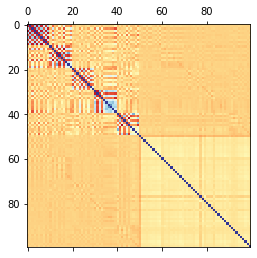

In [69]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.matshow(correlation,cmap =plt.cm.RdYlBu)
plt.show()

           EXT1_E    EXT2_E    EXT3_E    EXT4_E    EXT5_E    EXT6_E    EXT7_E  \
EXT1_E   1.000000 -0.042705 -0.068365 -0.063817 -0.062901 -0.061285 -0.069175   
EXT2_E  -0.042705  1.000000  0.124490  0.115117  0.123853  0.141127  0.131807   
EXT3_E  -0.068365  0.124490  1.000000  0.089099  0.122023  0.122573  0.120882   
EXT4_E  -0.063817  0.115117  0.089099  1.000000  0.092700  0.108375  0.116597   
EXT5_E  -0.062901  0.123853  0.122023  0.092700  1.000000  0.128227  0.127551   
EXT6_E  -0.061285  0.141127  0.122573  0.108375  0.128227  1.000000  0.135496   
EXT7_E  -0.069175  0.131807  0.120882  0.116597  0.127551  0.135496  1.000000   
EXT8_E  -0.067732  0.122357  0.107094  0.117755  0.111751  0.129904  0.139451   
EXT9_E  -0.065551  0.137326  0.123114  0.115794  0.131259  0.148936  0.161556   
EXT10_E -0.053258  0.144941  0.122784  0.135091  0.130142  0.147913  0.169795   
AGR1_E  -0.096593  0.093665  0.069098  0.068667  0.062106  0.073540  0.073074   
AGR2_E  -0.058892  0.138631 

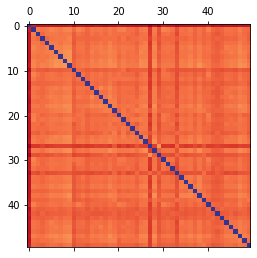

In [71]:
correlation = df[columns_list_time].corr()
print(correlation)
plt.matshow(correlation,cmap =plt.cm.RdYlBu)
plt.show()

In [72]:
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country
0,4,1,5,2,5,1,5,2,4,1,1,4,4,2,2,2,2,2,3,2,2,5,2,4,2,3,2,4,3,4,3,4,3,2,2,4,4,2,4,4,5,1,4,1,4,1,5,3,4,5,0.261375,0.152374,0.109861,0.133781,0.155704,0.076478,0.066266,0.058635,0.163723,0.114051,0.170245,0.115161,0.159256,0.176599,0.101647,0.140691,0.158423,0.118908,0.071789,0.110916,0.131811,0.151930,0.323035,0.086440,0.088993,0.090464,0.284019,0.163640,0.048784,0.085497,0.183204,0.151430,0.043539,0.059079,0.104394,0.122654,0.260348,0.146685,0.138277,0.175906,0.087301,0.112858,0.082111,0.094654,0.060217,0.136529,0.123098,0.086468,0.083027,0.120822,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB
1,3,5,3,4,3,3,2,5,1,5,2,3,4,1,3,1,2,1,3,1,1,4,1,5,1,5,3,4,5,3,3,2,5,3,3,1,3,3,5,3,1,2,4,2,3,1,4,2,5,3,0.266940,0.132751,0.122309,0.094601,0.109802,0.112532,0.176620,0.119099,0.127844,0.122088,0.333390,0.088771,0.128545,0.123933,0.112938,0.093678,0.155921,0.109285,0.066375,0.059291,0.079621,0.077112,0.079068,0.103566,0.126257,0.196433,0.165809,0.133821,0.068257,0.064457,0.190493,0.193334,0.265944,0.102681,0.151383,0.126589,0.123490,0.088513,0.123970,0.206432,0.096814,0.183925,0.062132,0.111646,0.174959,0.123084,0.100283,0.124486,0.114229,0.111388,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY
2,2,3,4,4,3,2,1,3,2,5,4,4,4,2,2,2,2,2,1,3,1,4,1,4,2,4,1,4,4,3,4,2,2,2,3,3,4,2,4,2,5,1,2,1,4,2,5,3,4,4,0.144053,0.109780,0.078662,0.103160,0.180863,0.078569,0.152251,0.097190,0.452266,0.067773,0.158623,0.113677,0.106470,0.140620,0.255968,0.067588,0.066938,0.036346,0.117946,0.049276,0.033686,0.068145,0.104738,0.045285,0.079249,0.046182,0.094870,0.424365,0.120390,0.126824,0.132577,0.147703,0.083920,0.087014,0.131062,0.195123,0.083209,0.046894,0.073589,0.092272,0.059700,0.045471,0.050853,0.052060,0.068949,0.250988,0.063195,0.194721,0.049028,0.078229,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB
3,2,2,2,3,4,2,2,4,1,4,3,3,3,2,3,2,2,2,4,3,2,4,3,4,2,4,2,4,3,4,2,4,4,4,1,2,2,3,1,4,4,2,5,2,3,1,4,4,3,3,0.117080,0.084851,0.149310,0.124229,0.151419,0.159857,0.127745,0.131730,0.153529,0.117197,0.109462,0.135246,0.088338,0.079431,0.116025,0.119073,0.123292,0.086023,0.214940,0.114150,0.177613,0.350186,0.030471,0.066334,0.107353,0.089334,0.143918,0.221064,0.135715,0.202048,0.082741,0.015236,0.069381,0.094490,0.083445,0.183531,0.110166,0.306823,0.093524,0.225722,0.101259,0.195280,0.057925,0.109228,0.120948,0.110634,0.087429,0.122823,0.101962,0.095428,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB
4,3,3,3,3,5,3,3,5,3,4,1,5,5,3,1,1,1,1,3,2,1,5,1,5,1,3,1,5,5,3,5,1,5,1,3,1,5,1,5,5,5,1,5,1,5,1,5,3,5,5,0.100016,0.066050,0.045327,0.061735,0.049442,0.040413,0.122255,0.055005,0.280175,0.062152,0.078960,0.047576,0.124287,0.036298,0.055372,0.037564,0.071764,0.075062,0.052090,0.051890,0.112793,0.046960,0.061336,0.041829,0.269930,0.028919,0.482805,0.026853,0.040596,0.075495,0.064018,0.116924,0.051674,0.052523,0.047792,0.109111,0.030168,0.061336,0.358152,0.342943,0.140895,0.058470,0.283889,0.117091,0.038764,0.097201,0.114042,0.088622,0.189920,0.143960,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE


In [73]:
df[columns_list] = df[columns_list].apply(lambda x : x-3)

In [74]:
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country
0,1,-2,2,-1,2,-2,2,-1,1,-2,-2,1,1,-1,-1,-1,-1,-1,0,-1,-1,2,-1,1,-1,0,-1,1,0,1,0,1,0,-1,-1,1,1,-1,1,1,2,-2,1,-2,1,-2,2,0,1,2,0.261375,0.152374,0.109861,0.133781,0.155704,0.076478,0.066266,0.058635,0.163723,0.114051,0.170245,0.115161,0.159256,0.176599,0.101647,0.140691,0.158423,0.118908,0.071789,0.110916,0.131811,0.151930,0.323035,0.086440,0.088993,0.090464,0.284019,0.163640,0.048784,0.085497,0.183204,0.151430,0.043539,0.059079,0.104394,0.122654,0.260348,0.146685,0.138277,0.175906,0.087301,0.112858,0.082111,0.094654,0.060217,0.136529,0.123098,0.086468,0.083027,0.120822,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB
1,0,2,0,1,0,0,-1,2,-2,2,-1,0,1,-2,0,-2,-1,-2,0,-2,-2,1,-2,2,-2,2,0,1,2,0,0,-1,2,0,0,-2,0,0,2,0,-2,-1,1,-1,0,-2,1,-1,2,0,0.266940,0.132751,0.122309,0.094601,0.109802,0.112532,0.176620,0.119099,0.127844,0.122088,0.333390,0.088771,0.128545,0.123933,0.112938,0.093678,0.155921,0.109285,0.066375,0.059291,0.079621,0.077112,0.079068,0.103566,0.126257,0.196433,0.165809,0.133821,0.068257,0.064457,0.190493,0.193334,0.265944,0.102681,0.151383,0.126589,0.123490,0.088513,0.123970,0.206432,0.096814,0.183925,0.062132,0.111646,0.174959,0.123084,0.100283,0.124486,0.114229,0.111388,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY
2,-1,0,1,1,0,-1,-2,0,-1,2,1,1,1,-1,-1,-1,-1,-1,-2,0,-2,1,-2,1,-1,1,-2,1,1,0,1,-1,-1,-1,0,0,1,-1,1,-1,2,-2,-1,-2,1,-1,2,0,1,1,0.144053,0.109780,0.078662,0.103160,0.180863,0.078569,0.152251,0.097190,0.452266,0.067773,0.158623,0.113677,0.106470,0.140620,0.255968,0.067588,0.066938,0.036346,0.117946,0.049276,0.033686,0.068145,0.104738,0.045285,0.079249,0.046182,0.094870,0.424365,0.120390,0.126824,0.132577,0.147703,0.083920,0.087014,0.131062,0.195123,0.083209,0.046894,0.073589,0.092272,0.059700,0.045471,0.050853,0.052060,0.068949,0.250988,0.063195,0.194721,0.049028,0.078229,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB
3,-1,-1,-1,0,1,-1,-1,1,-2,1,0,0,0,-1,0,-1,-1,-1,1,0,-1,1,0,1,-1,1,-1,1,0,1,-1,1,1,1,-2,-1,-1,0,-2,1,1,-1,2,-1,0,-2,1,1,0,0,0.117080,0.084851,0.149310,0.124229,0.151419,0.159857,0.127745,0.131730,0.153529,0.117197,0.109462,0.135246,0.088338,0.079431,0.116025,0.119073,0.123292,0.086023,0.214940,0.114150,0.177613,0.350186,0.030471,0.066334,0.107353,0.089334,0.143918,0.221064,0.135715,0.202048,0.082741,0.015236,0.069381,0.094490,0.083445,0.183531,0.110166,0.306823,0.093524,0.225722,0.101259,0.195280,0.057925,0.109228,0.120948,0.110634,0.087429,0.122823,0.101962,0.095428,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB
4,0,0,0,0,2,0,0,2,0,1,-2,2,2,0,-2,-2,-2,-2,0,-1,-2,2,-2,2,-2,0,-2,2,2,0,2,-2,2,-2,0,-2,2,-2,2,2,2,-2,2,-2,2,-2,2,0,2,2,0.100016,0.066050,0.045327,0.061735,0.049442,0.040413,0.122255,0.055005,0.280175,0.062152,0.078960,0.047576,0.124287,0.036298,0.055372,0.037564,0.071764,0.075062,0.052090,0.051890,0.112793,0.046960,0.061336,0.041829,0.269930,0.028919,0.482805,0.026853,0.040596,0.075495,0.064018,0.116924,0.051674,0.052523,0.047792,0.109111,0.030168,0.061336,0.358152,0.342943,0.140895,0.058470,0.283889,0.117091,0.038764,0.097201,0.114042,0.088622,0.189920,0.143960,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE


In [77]:
df["EXT"] = df["EXT1"] - df["EXT2"] + df["EXT3"] - df["EXT4"] + \
    df["EXT5"] - df["EXT6"] + df["EXT7"] - df["EXT8"] + df["EXT9"] - df["EXT10"]

df["EST"] = df["EST1"] - df["EST2"] + df["EST3"] - df["EST4"] + \
    df["EST5"] + df["EST6"] + df["EST7"] + df["EST8"] + df["EST9"] + df["EST10"]

df["AGR"] = - df["AGR1"] + df["AGR2"] - df["AGR3"] + df["AGR4"] - \
    df["AGR5"] + df["AGR6"] - df["AGR7"] + df["AGR8"] + df["AGR9"] + df["AGR10"]

df["CSN"] = df["CSN1"] - df["CSN2"] + df["CSN3"] - df["CSN4"] + \
    df["CSN5"] - df["CSN6"] + df["CSN7"] - df["CSN8"] + df["CSN9"] + df["CSN10"]

df["OPN"] = df["OPN1"] - df["OPN2"] + df["OPN3"] - df["OPN4"] + \
    df["OPN5"] - df["OPN6"] + df["OPN7"] - df["OPN8"] + df["OPN9"] + df["OPN10"]

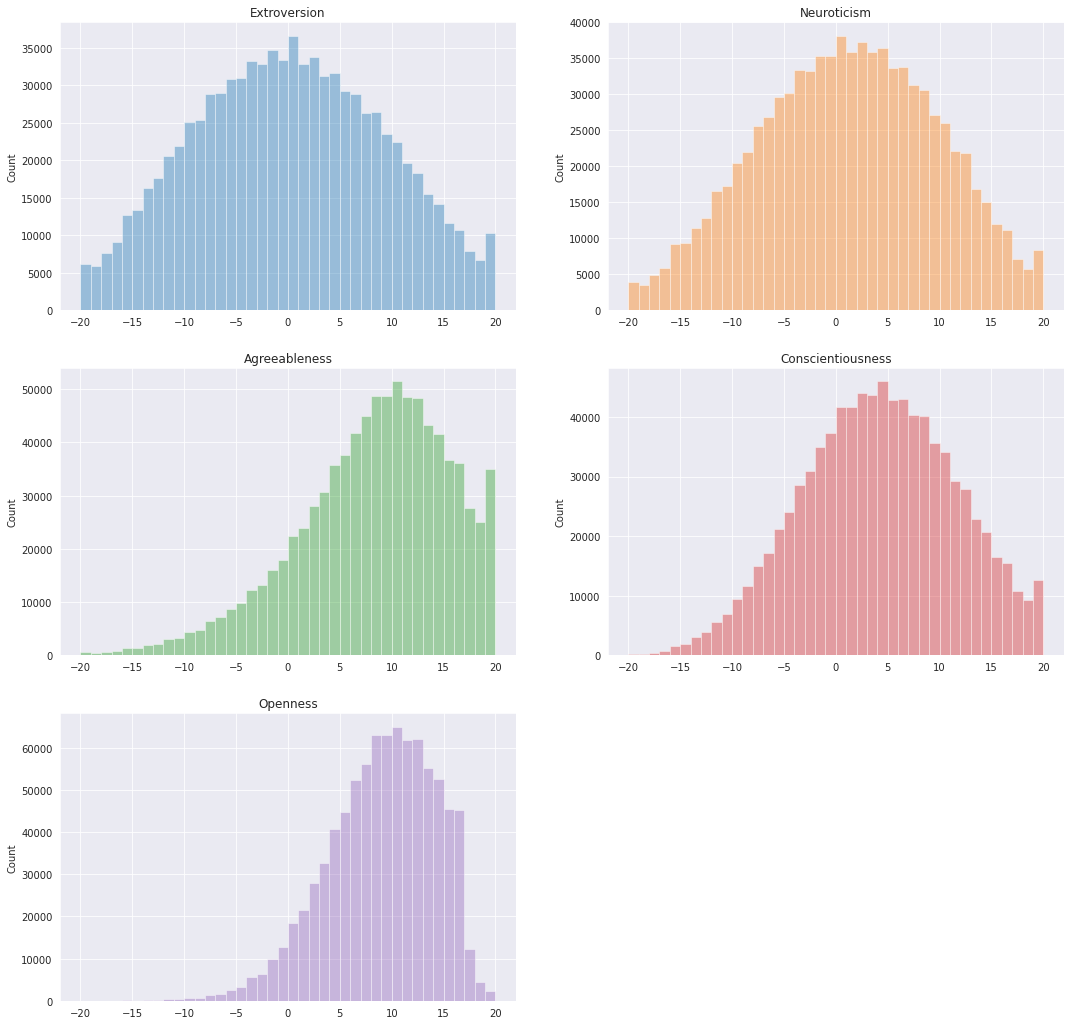

In [89]:
fig, axs = plt.subplots(ncols = 2, nrows = 3, figsize = (18, 18))
sns.distplot(df["EXT"], bins = 40, kde = False, 
             ax = axs[0, 0], color = sns.color_palette()[0]).set_title("Extroversion")
sns.distplot(df["EST"], bins = 40, kde = False, 
             ax = axs[0, 1], color = sns.color_palette()[1]).set_title("Neuroticism")
sns.distplot(df["AGR"], bins = 40, kde = False, 
             ax = axs[1, 0], color = sns.color_palette()[2]).set_title("Agreeableness")
sns.distplot(df["CSN"], bins = 40, kde = False, 
             ax = axs[1, 1], color = sns.color_palette()[3]).set_title("Conscientiousness")
sns.distplot(df["OPN"], bins = 40, kde = False, 
             ax = axs[2, 0], color = sns.color_palette()[4]).set_title("Openness")
sns.set_style("dark")
fig.delaxes(axs[2, 1])
for ax in axs.flat:
    ax.set(xlabel = None, ylabel = "Count")
    
plt.show()

          EXT       AGR       CSN       EST       OPN
EXT  1.000000  0.299514  0.064120 -0.221992  0.168207
AGR  0.299514  1.000000  0.144652 -0.041111  0.167185
CSN  0.064120  0.144652  1.000000 -0.231900  0.092478
EST -0.221992 -0.041111 -0.231900  1.000000 -0.116786
OPN  0.168207  0.167185  0.092478 -0.116786  1.000000


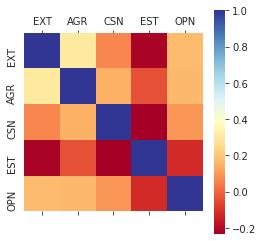

In [98]:
correlation = df[personality_traits].corr()
print(correlation)
plt.matshow(correlation,cmap =plt.cm.RdYlBu)

with sns.axes_style("white"):
    sns.heatmap(correlation,  cmap = "RdYlBu")
plt.show()